In [49]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dist9.csv')

df_tr = df

df_tr = pd.get_dummies(df_tr, columns=['STATE_UT_NAME'])

clmns = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']
df_tr_std = stats.zscore(df_tr[clmns])

kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-07,random_state=0).fit(df_tr_std)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df_tr['clusters'] = labels

clmns.extend(['clusters'])

print (df_tr[clmns].groupby(['clusters']).mean())

                JAN        FEB        MAR         APR         MAY         JUN  \
clusters                                                                        
0          6.072727   4.781818   3.700000    2.950000   10.304545   64.700000   
1         11.344444  23.388889  27.922222   36.766667   73.072222  216.533333   
2          9.542857  16.200000  31.071429  109.021429  244.728571  658.707143   

                 JUL         AUG         SEP         OCT         NOV  \
clusters                                                               
0         233.627273  240.972727  106.195455   18.390909    7.777273   
1         319.616667  356.705556  240.194444  122.327778   31.066667   
2         724.328571  417.950000  245.157143  290.907143  151.535714   

                DEC       ANNUAL  
clusters                          
0          3.600000   703.072727  
1          5.527778  1464.466667  
2         38.242857  2937.392857  


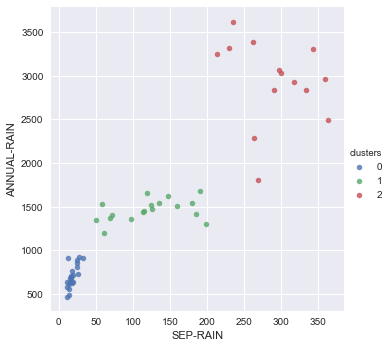

In [58]:
#Scatter plot of Wattage and Duration
sns.lmplot('OCT', 'ANNUAL', data=df_tr, fit_reg=False, hue="clusters",  scatter_kws={"marker": "D", "s": 30})

plt.xlabel('SEP-RAIN')
plt.ylabel('ANNUAL-RAIN')
plt.savefig('./scatter.png', dpi=600)
plt.show()

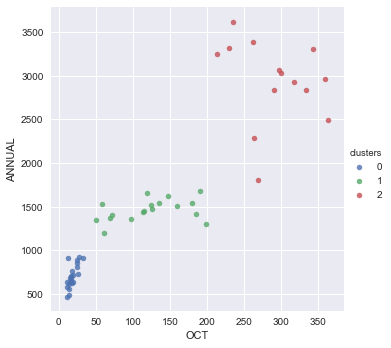

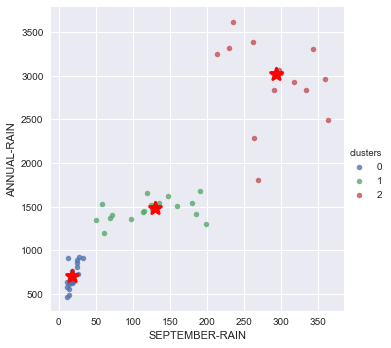

In [61]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0).fit(df_tr)

centroids = km.cluster_centers_

sns.lmplot('OCT', 'ANNUAL', data=df_tr, fit_reg=False, hue="clusters",  scatter_kws={"marker": "D", "s": 30})
plt.scatter(centroids[:,9], centroids[:, 12],marker='*', s=150, linewidths=3,color='r', label='centroids')

plt.xlabel('SEPTEMBER-RAIN')
plt.ylabel('ANNUAL-RAIN')
plt.savefig('./scatwcen.png', dpi=300)
plt.show()

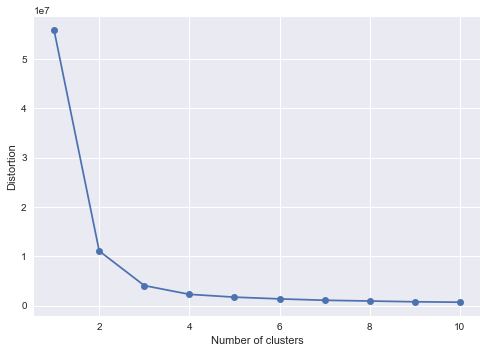

In [62]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(df_tr)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('./distortion.png', dpi=300)
plt.show()

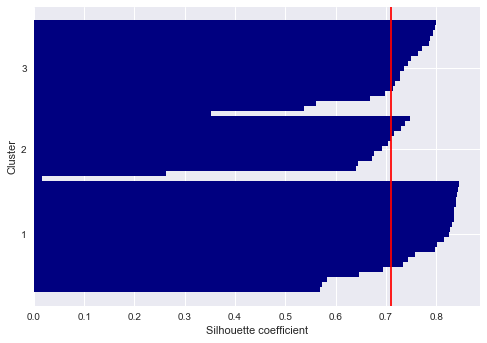

In [63]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0).fit(df_tr)
y_km = km.fit_predict(df_tr)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df_tr,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,color="red",linestyle="-")
plt.yticks(yticks, cluster_labels + 1)

plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.savefig('./silhouette.png', dpi=300)
plt.show()